In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "dejavuserif"})

In [2]:
# Definición de las formulas de sellmeier para el cálculo de los índices de refracción
# en función de la longitud de onda (wl).
# Datos obtenidos de: https://refractiveindex.info/

def BAF10(wl):
    #BAF10
    n2 = 1 + (1.5851495*wl**2)/(wl**2-0.00926681282)+ \
         (0.143559385*wl**2)/(wl**2 - 0.0424489805) + \
         (1.08521269*wl**2)/(wl**2-105.613573)
    return np.sqrt(n2)

def BK7(wl):
    #BK7
    n2 = 1 + (1.03961212*wl**2)/(wl**2-0.00600069867)+ \
         (0.231792344*wl**2)/(wl**2 - 0.0200179144) + \
         (1.01046945*wl**2)/(wl**2-103.560653)
    return np.sqrt(n2)

In [3]:
# Array de longitudes de onda desde 0.4 um hasta 2 um 
wl = np.linspace(0.4,2,1000)

# Array con los valores del indice de refracción del
# rombo hecho con BAF10
n_rhomb_val = BAF10(wl)

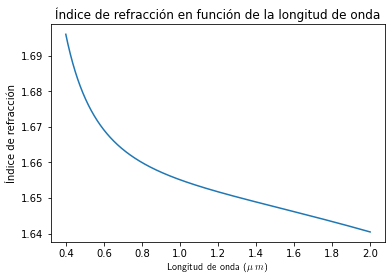

In [4]:
# Gráfica de la dependencia del índice de refracción 
# con la longitud de onda

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(wl,n_rhomb_val)
ax.set_title('Índice de refracción en función de la longitud de onda')
ax.set_xlabel('Longitud de onda ($\mu\:m$)',usetex=True)
ax.set_ylabel('Índice de refracción');

### Dependencia del desfase con la longitud de onda en incdencia normal

![Rombo de Mooney](Images/Rombo.png "Title")

* Fórmula para el desfase en cada una de las reflexiones:
    $$\tan \frac{\Delta}{2} = -\frac{\cos \theta_i \sqrt{n_1^2\sin^2(\theta_i)-n_2^2}}{n_1 \sin^2(\theta_i)}$$
    $$\Delta = 2 \arctan\left(-\frac{\cos \theta_i \sqrt{n_1^2\sin^2(\theta_i)-n_2^2}}{n_1 \sin^2(\theta_i)}\right)$$
    
$n_1$ es el índice de refracción del rombo y $n_2$ el índice de refracción del medio exterior (aire). En ambas reflexiones el ángulo de incidencia corresponde con el ángulo del rombo $\theta_i = \theta_R$. En este caso concreto es $\theta_R = 60^{\circ}$

In [5]:
n1 = 1.0
n2 = n_rhomb_val

# Primera reflexion en el interior del rombo
theta_i = np.radians(60.0)
phase1 = 2*np.arctan(-(np.cos(theta_i)*np.sqrt(n2**2*np.sin(theta_i)**2-n1**2))/\
                    (n2*np.sin(theta_i)**2))

# Segunda reflexion en el interior del rombo
theta_i = np.radians(60.0)
phase2 = 2*np.arctan(-(np.cos(theta_i)*np.sqrt(n2**2*np.sin(theta_i)**2-n1**2))/\
                    (n2*np.sin(theta_i)**2))

# Suma de los desfases a la salida.
# No se tienen en cuenta las refracciones de entrada
# en el rombo ni en la salida, ya que en las transmisiones
# el desfase añadido es nulo
phase = phase1+phase2

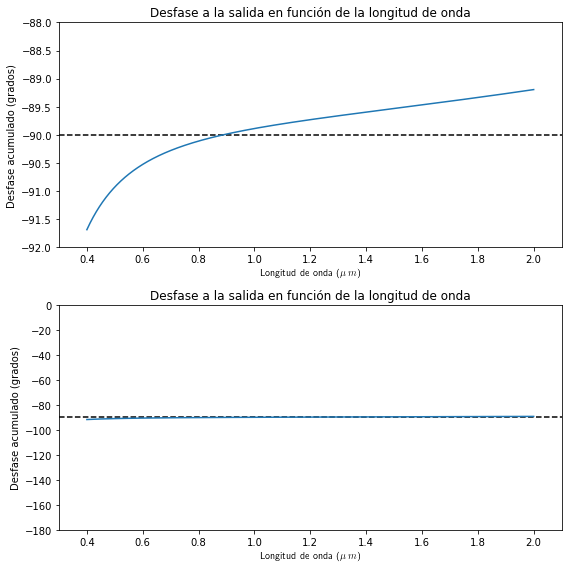

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax.axhline(-90,linestyle='--',c='k')
ax.plot(wl,np.degrees(phase))
# ax.set_ylim(0.4,0.6);
ax.set_ylim(-92,-88)
ax.set_xlim(0.3,2.1)
ax.set_title('Desfase a la salida en función de la longitud de onda')
ax.set_xlabel('Longitud de onda ($\mu\:m$)', usetex=True)
ax.set_ylabel('Desfase acumulado (grados)')

ax = fig.add_subplot(212)
ax.axhline(-90,linestyle='--',c='k')
ax.plot(wl,np.degrees(phase))
# ax.set_ylim(0.4,0.6);
ax.set_ylim(-180,-0)
ax.set_xlim(0.3,2.1)
ax.set_title('Desfase a la salida en función de la longitud de onda')
ax.set_xlabel('Longitud de onda ($\mu\:m$)', usetex=True)
ax.set_ylabel('Desfase acumulado (grados)')

fig.tight_layout()

### Incidencia fuera de la normal

![Rombo de Mooney en incidencia fuera de la normal](Images/Rombo_NoNormal.png "Title")

Habrá que resolver los triangulos verde y azul para obtener los ángulos de incidencia para las reflexiones.

* Triangulo verde
    $$ n_{aire} \sin(\theta_i) = n_{rombo} \sin(\theta_t) \Rightarrow \theta_t = \arcsin\left(\frac{n_{aire}}{n_{rombo}} \sin(\theta_i)\right)$$
    $$ 180º = \theta_t + \theta_1 + (180º - \theta_R) $$
    $$ \theta_1 = \theta_R - \theta_t$$
   
* Triangulo azul
    $$ 180º  = (90º - \theta_1) + 2\theta_R + (90º-\theta_2)$$
    $$ \theta_2 = 2 \theta_R - \theta_1 = 2 \theta_R - \theta_R \theta_t$$
    $$ \theta_2 = \theta_R + \theta_t$$
$\theta_R$ sigue siendo el ángulo del rombo y toma el mismo valor que en el caso anterior. Los desfases se calcularan usando las mismas relaciones presentadas en el apartado anterior, pero fijando el indice de refracción del rombo y los ángulos de incidencia en las reflexiones ahora tendrán una dependencia con el ángulo de incidencia sobre el rombo

In [7]:
n1 = 1.0     # índice de refracción del aire
n2 = 1.658   # índice de refracción del rombo


# Suponemos ángulos de incidencia en el rombo desde -10º hasta 10º
theta_i = np.linspace(np.radians(-10.0),np.radians(10.0),1000)
# Calculamos los angulos de transmisión en la transimisión de la cara
# de incidencia empleando la ley de snell
theta_t = np.arcsin(n1/n2*np.sin(theta_i))

# Primera reflexión en el interior del rombo
theta_1 = np.radians(60.0-np.degrees(theta_t))
phase1 = 2*np.arctan(-(np.cos(theta_1)*np.sqrt(n2**2*np.sin(theta_1)**2-n1**2))/\
                    (n2*np.sin(theta_1)**2))

# Segunda reflexión en el interior del rombo
theta_2 = np.radians(60.0+np.degrees(theta_t))
phase2 = 2*np.arctan(-(np.cos(theta_2)*np.sqrt(n2**2*np.sin(theta_2)**2-n1**2))/\
                    (n2*np.sin(theta_2)**2))
phase = phase1+phase2

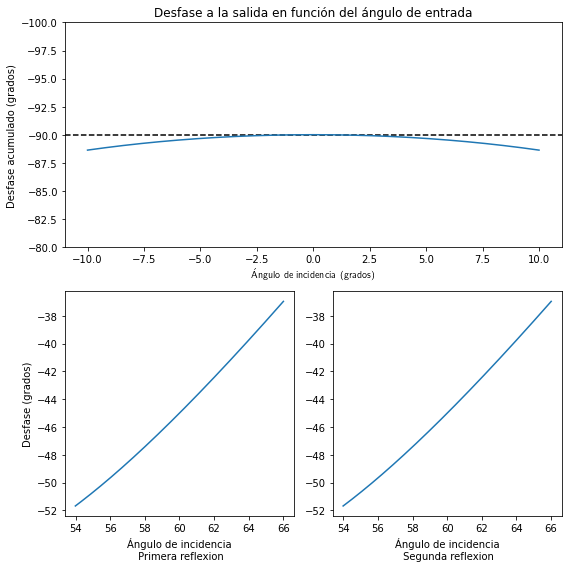

In [8]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(211)
ax.axhline(-90,linestyle='--',c='k')
ax.plot(np.degrees(theta_i),np.degrees(phase))
ax.set_ylim(-80,-100)
ax.set_title('Desfase a la salida en función del ángulo de entrada')
ax.set_xlabel('Ángulo de incidencia (grados)', usetex=True)
ax.set_ylabel('Desfase acumulado (grados)')

ax = fig.add_subplot(223)
ax.plot(np.degrees(theta_1),np.degrees(phase1))
ax.set_ylabel('Desfase (grados)')
ax.set_xlabel('Ángulo de incidencia\n Primera reflexion')

ax = fig.add_subplot(224)
ax.plot(np.degrees(theta_2),np.degrees(phase2))
ax.set_xlabel('Ángulo de incidencia\n Segunda reflexion')


fig.tight_layout()